# Introduction
In this section, you should give an introduction to the topic related to your chosen data set. Describe the topic and explain why it is important to analyze and understand the results. You should provide enough information on the topic in this section so that someone who has no knowledge of the topic can understand what you are doing and why it is important.

### Dataset

##### Season 2018/2019 - Seria A

(FT & HT results; match stats; match, total goals & AH odds)


##### Season 2018/2019 - Serie B
(FT & HT results; match stats; match odds and total goals odds)



# Research Question & Hypothesis
In this section, you should present the question you are trying to answer with your analysis along with a prediction of what you think the results will be. Remember that your results will either support or not support your hypothesis. Do not be concerned if your results do not support your hypothesis as this leaves room for you to discuss in the conclusion why you think the results supported or did not support your hypothesis.

# Experimental Design
Here, you should explain what type of analysis you will use and why it is the appropriate type of analysis. In the course, you learned about a number of ways to analyze data.  You learned about z-tests, t-tests, and how to run an analysis of variance. You also learned about performing regression and how to perform chi-squared tests. Choose one of these methods as your main type of analysis and provide detailed reasoning for this choice.

# Results
This section should include all of the results from your analysis. Provide all the information from your analysis even if it does not support your hypothesis. You should also provide screenshots/images of your data. You can use whatever types of visualizations that best represent the data (i.e. graphs, bar charts, histograms, etc).  

# Conclusion
Here, you should discuss whether or not the results from your data supported or did not support your hypothesis. If the results did not support your hypothesis, discuss why you think they did not and if there is anything that could have been done differently that would have changed the outcome. If your results did support your hypothesis, explain what this means and the real life implications. In either case, discuss why further research on the topic should be done and why it is important to do so.

# References

- https://old.datahub.io/dataset/italian-football-data-serie-a-b Dataset
- http://football-data.co.uk/italym.php
- https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [1]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot']) #graphs style

import math 

from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190713_Inferential_Statistic\Final_Project\I1.csv')

df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,I1,18/08/2018,Chievo,Juventus,2,3,A,1,1,D,...,2.13,19,2.00,1.68,1.64,2.38,2.29,18.84,6.42,1.22
1,I1,18/08/2018,Lazio,Napoli,1,2,A,1,1,D,...,2.17,20,0.00,2.12,2.07,1.83,1.79,2.78,3.57,2.59
2,I1,19/08/2018,Bologna,Spal,0,1,A,0,0,D,...,1.58,19,-0.25,1.97,1.92,1.99,1.94,2.31,3.18,3.59
3,I1,19/08/2018,Empoli,Cagliari,2,0,H,1,0,H,...,1.71,19,-0.25,1.98,1.91,1.98,1.94,2.54,3.42,2.95
4,I1,19/08/2018,Parma,Udinese,2,2,D,1,0,H,...,1.65,20,0.00,1.81,1.77,2.18,2.10,2.80,3.24,2.78


In [3]:
print(df.columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
       'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


In [4]:
df = df[['FTHG','FTAG','HS','AS']]

In [5]:
H_Perc = (df['FTHG']/df['HS'])*100
A_Perc = (df['FTAG']/df['AS'])*100
df = pd.concat([H_Perc , A_Perc], axis=1)
df = df.rename(columns={0: "H_Perc", 1: "A_Perc"})
df.head()

,H_Perc,A_Perc
0,28.571429,13.043478
1,11.111111,18.181818
2,0.000000,10.000000
3,22.222222,0.000000
4,22.222222,12.500000


In [6]:
df.describe()

,H_Perc,A_Perc
count,380.000000,380.000000
mean,13.361126,13.590962
std,10.759290,13.734231
min,0.000000,0.000000
25%,5.800654,0.000000
50%,12.500000,11.111111
75%,20.000000,20.000000
max,60.000000,100.000000


# Assumptions
- The more that you shoot towards the goal more likely you scored
- Teams playing home are more likely to shoot more 




Text(0.5,1,'Home Percentage of Goals/Shots histogram')

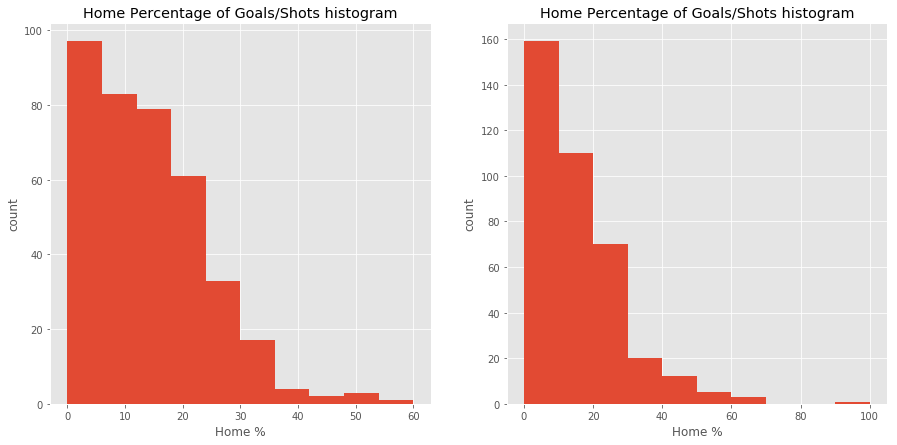

In [7]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1).hist(df['H_Perc'],bins=10)
# set x/y labels and plot title
plt.xlabel("Home %")
plt.ylabel("count")
plt.title("Home Percentage of Goals/Shots histogram")

plt.subplot(1, 2, 2).hist(df['A_Perc'],bins=10)
# set x/y labels and plot title
plt.xlabel("Home %")
plt.ylabel("count")
plt.title("Home Percentage of Goals/Shots histogram")

In [17]:
def log(column):
    y = np.log(column+1)
    return y

df['H_Perc'] = log(df['H_Perc'])
df['A_Perc'] = log(df['A_Perc'])

In [18]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
df['H_Perc'] = normalize(df['H_Perc'])
df['A_Perc'] = normalize(df['A_Perc'])

Text(0.5,1,'Home Percentage of Goals/Shots histogram')

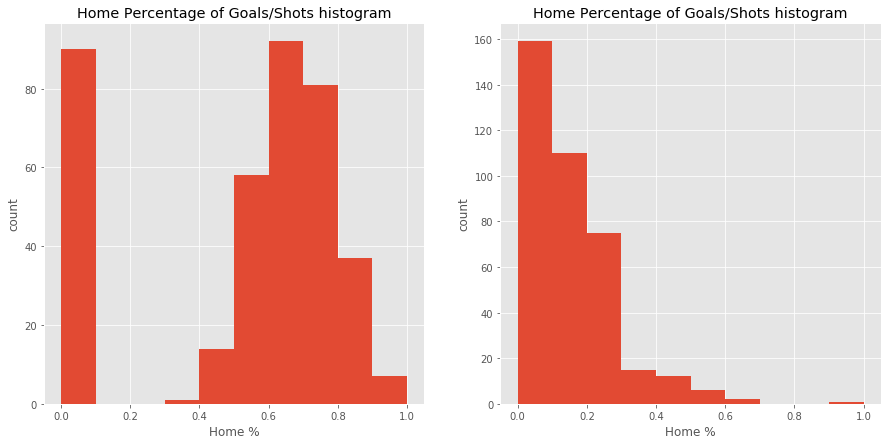

In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1).hist(df['H_Perc'] , bins=10)
# set x/y labels and plot title
plt.xlabel("Home %")
plt.ylabel("count")
plt.title("Home Percentage of Goals/Shots histogram")

plt.subplot(1, 2, 2).hist(df['A_Perc'] , bins=10)
# set x/y labels and plot title
plt.xlabel("Home %")
plt.ylabel("count")
plt.title("Home Percentage of Goals/Shots histogram")

In [20]:
stats.ttest_ind(df['H_Perc'] , df['A_Perc'])

Ttest_indResult(statistic=22.339878887039028, pvalue=2.5064880559615762e-85)

In [21]:
df.describe()

,H_Perc,A_Perc
count,380.000000,380.000000
mean,0.521802,0.135910
std,0.307443,0.137342
min,0.000000,0.000000
25%,0.466275,0.000000
50%,0.633123,0.111111
75%,0.740602,0.200000
max,1.000000,1.000000
